# Install all

In [77]:
#!pip install seaborn
#!pip install pandas_datareader
#!  pip install keras


# Import

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math
import pandas_datareader as web


In [79]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [80]:
url = 'https://raw.githubusercontent.com/Aabishkar2/nepse-data/refs/heads/main/data/company-wise/ADBL.csv'
data = pd.read_csv(url)
selected_data = data[['published_date', 'close']]
selected_data.head()



,published_date,close
0,2010-09-16,120.0
1,2010-09-19,118.0
2,2010-09-20,118.0
3,2010-09-21,116.0
4,2010-09-23,120.0


In [81]:
print('There are {} number of days in the dataset.'.format(selected_data.shape[0]))

There are 3223 number of days in the dataset.


Plotting the graph


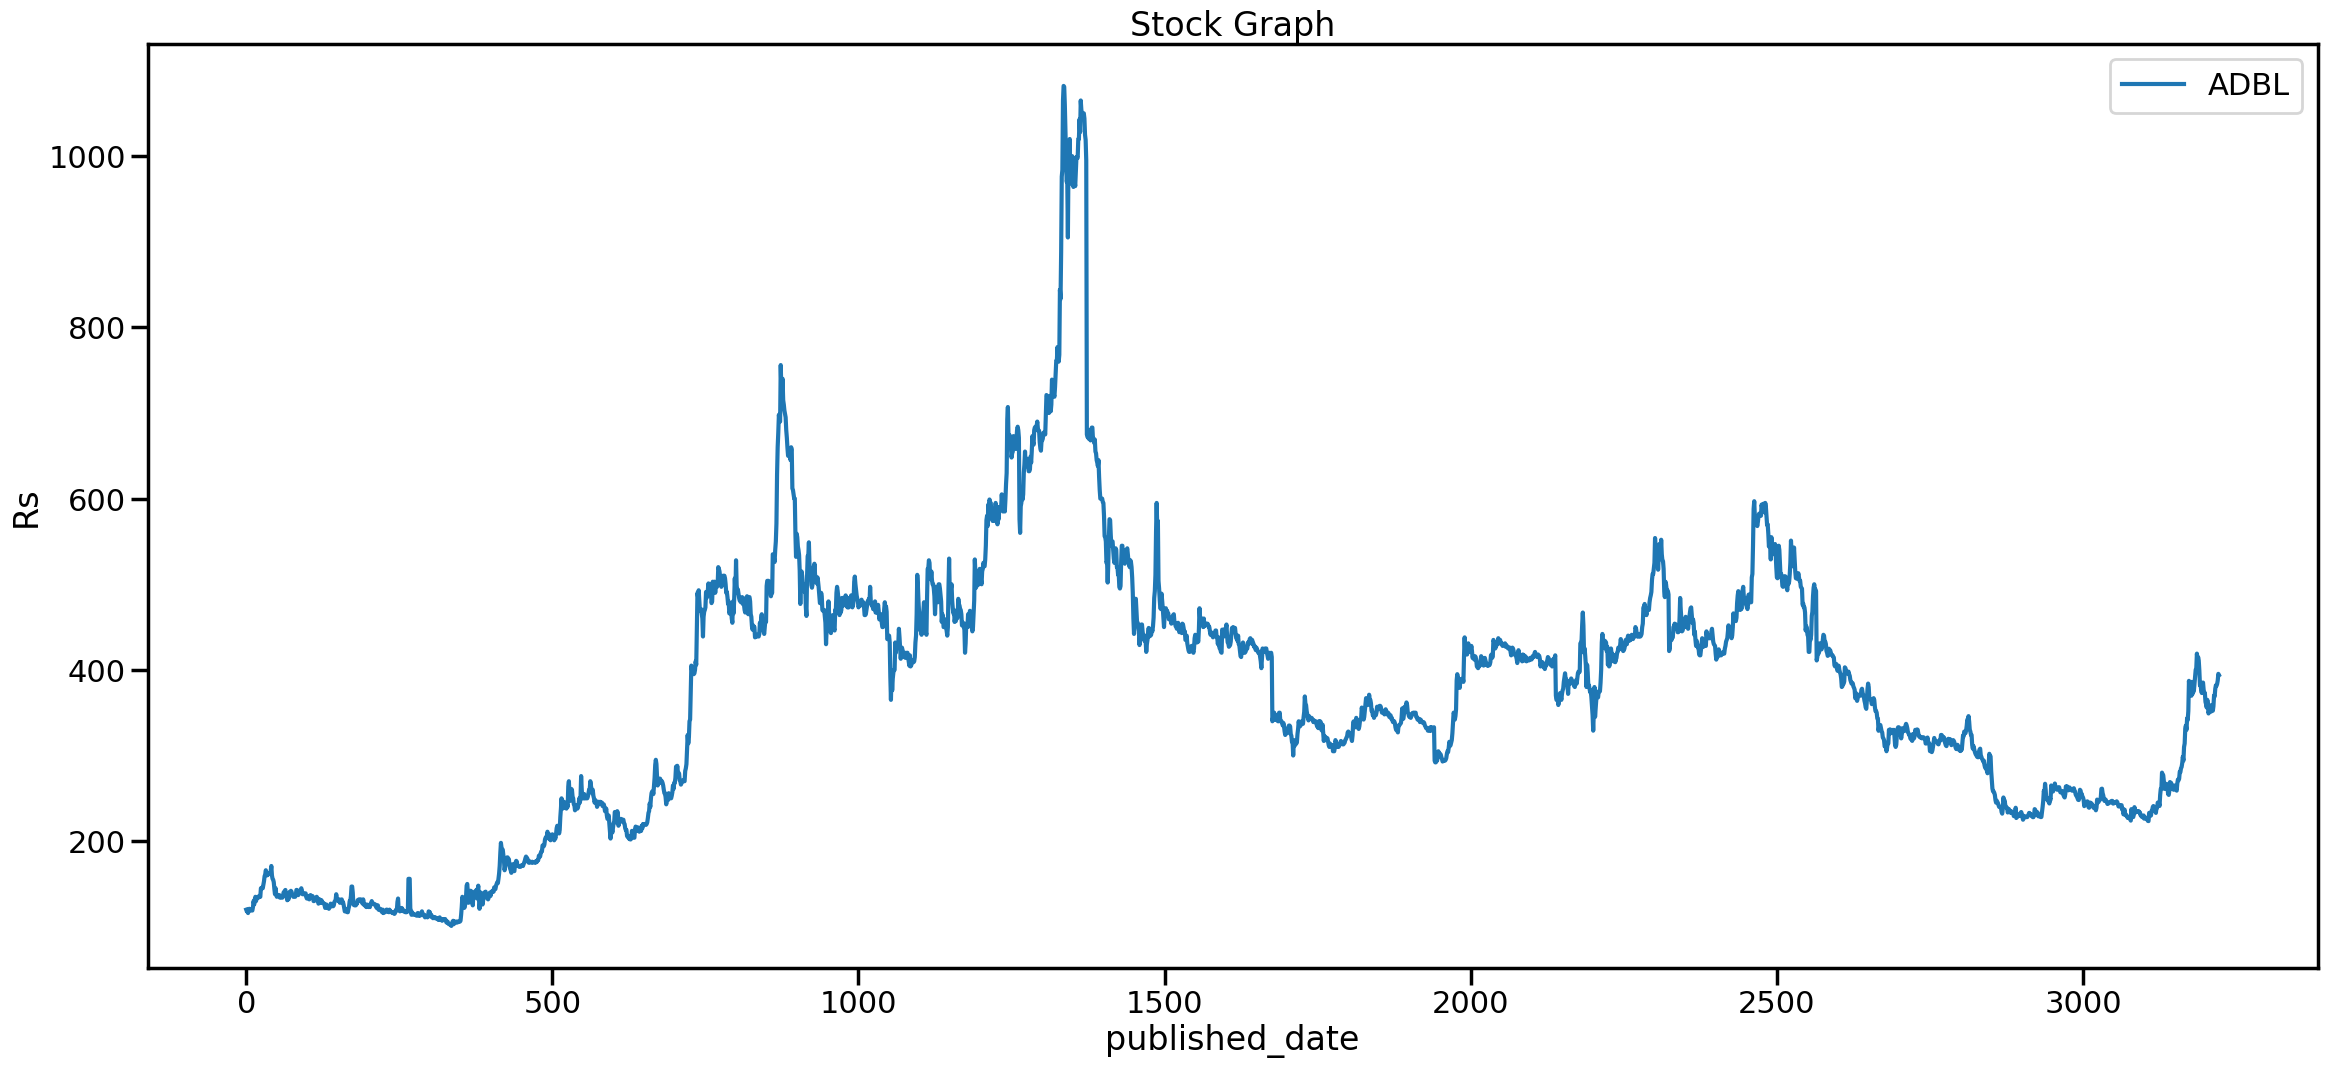

In [82]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(selected_data.index, data['close'], label='ADBL')
plt.xlabel('published_date')
plt.ylabel('Rs')
plt.title('Stock Graph')
plt.legend()
plt.show()

# Logic For Technical  Analysis

Moving averages (7 and 21 dayss)
MACD
Bolinger Bands
EMA
Momentum

In [83]:


def technical_analysis(dataset):
    # Moving Average of 7 and 21 days
    dataset.loc[:, 'ma7'] = dataset['close'].rolling(window=7).mean()
    dataset.loc[:, 'ma21'] = dataset['close'].rolling(window=21).mean()

    # Create MACD
    dataset.loc[:, '26ema'] = dataset['close'].ewm(span=26).mean()
    dataset.loc[:, '12ema'] = dataset['close'].ewm(span=12).mean()
    dataset.loc[:, 'MACD'] = dataset['12ema'] - dataset['26ema']

    # Create Bollinger Bands
    dataset.loc[:, '20sd'] = dataset['close'].rolling(window=21).std()
    dataset.loc[:, 'upper_band'] = dataset['ma21'] + (dataset['20sd'] * 2)
    dataset.loc[:, 'lower_band'] = dataset['ma21'] - (dataset['20sd'] * 2)

    # Create Exponential moving average
    dataset.loc[:, 'ema'] = dataset['close'].ewm(com=0.5).mean()

    # Create Momentum
    dataset.loc[:, 'momentum'] = dataset['close'] - 1
    dataset.loc[:, 'log_momentum'] = np.log(dataset['momentum'])

    return dataset


In [84]:
df=technical_analysis(selected_data)

C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_13416\880002497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'ma7'] = dataset['close'].rolling(window=7).mean()
C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_13416\880002497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'ma21'] = dataset['close'].rolling(window=21).mean()
C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_13416\880002497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [85]:
df

,published_date,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,2010-09-16,120.0,NaN,NaN,120.000000,120.000000,0.000000,NaN,NaN,NaN,120.000000,119.0,4.779123
1,2010-09-19,118.0,NaN,NaN,118.961538,118.916667,-0.044872,NaN,NaN,NaN,118.500000,117.0,4.762174
2,2010-09-20,118.0,NaN,NaN,118.616067,118.558891,-0.057176,NaN,NaN,NaN,118.153846,117.0,4.762174
3,2010-09-21,116.0,NaN,NaN,117.884729,117.751149,-0.133580,NaN,NaN,NaN,116.700000,115.0,4.744932
4,2010-09-23,120.0,NaN,NaN,118.375269,118.362154,-0.013115,NaN,NaN,NaN,118.909091,119.0,4.779123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,2024-10-08,381.4,370.042857,362.804762,367.059934,369.023022,1.963088,10.110118,383.024997,342.584527,380.778927,380.4,5.941223
3219,2024-10-09,383.5,374.500000,363.304762,368.277717,371.250249,2.972533,10.870578,385.045919,341.563605,382.592976,382.5,5.946729
3220,2024-10-15,387.5,378.785714,363.995238,369.701590,373.750211,4.048621,11.926419,387.848077,340.142400,385.864325,386.5,5.957132
3221,2024-10-16,395.4,382.400000,365.557143,371.605175,377.080948,5.475772,13.743856,393.044854,338.069431,392.221442,394.4,5.977366


In [86]:
df = df.dropna()
df.rows = df.iloc[0]
df

# Drop the first row after setting it as the header
df = df.set_index('published_date')

print(df)
df.head()

                close         ma7        ma21       26ema       12ema  \
published_date                                                          
2010-10-24      134.0  133.142857  124.714286  127.495172  130.136465   
2010-10-25      136.0  133.714286  125.476190  128.267159  131.062005   
2010-10-26      135.0  133.714286  126.285714  128.868266  131.681128   
2010-10-27      135.0  134.428571  127.095238  129.407506  132.201160   
2010-10-28      145.0  136.142857  128.476190  130.759993  134.200918   
...               ...         ...         ...         ...         ...   
2024-10-08      381.4  370.042857  362.804762  367.059934  369.023022   
2024-10-09      383.5  374.500000  363.304762  368.277717  371.250249   
2024-10-15      387.5  378.785714  363.995238  369.701590  373.750211   
2024-10-16      395.4  382.400000  365.557143  371.605175  377.080948   
2024-10-17      394.0  385.971429  367.176190  373.264051  379.683879   

                    MACD       20sd  upper_band  l

C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_13416\610484397.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.rows = df.iloc[0]


,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,
2010-10-24,134.0,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
2010-10-25,136.0,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
2010-10-26,135.0,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
2010-10-27,135.0,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
2010-10-28,145.0,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813


# Plotting these analysis

In [87]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators Agriculture Development Bank Limited {} days.'.format(last_days))
    plt.ylabel('NPR')
    plt.legend()

    # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

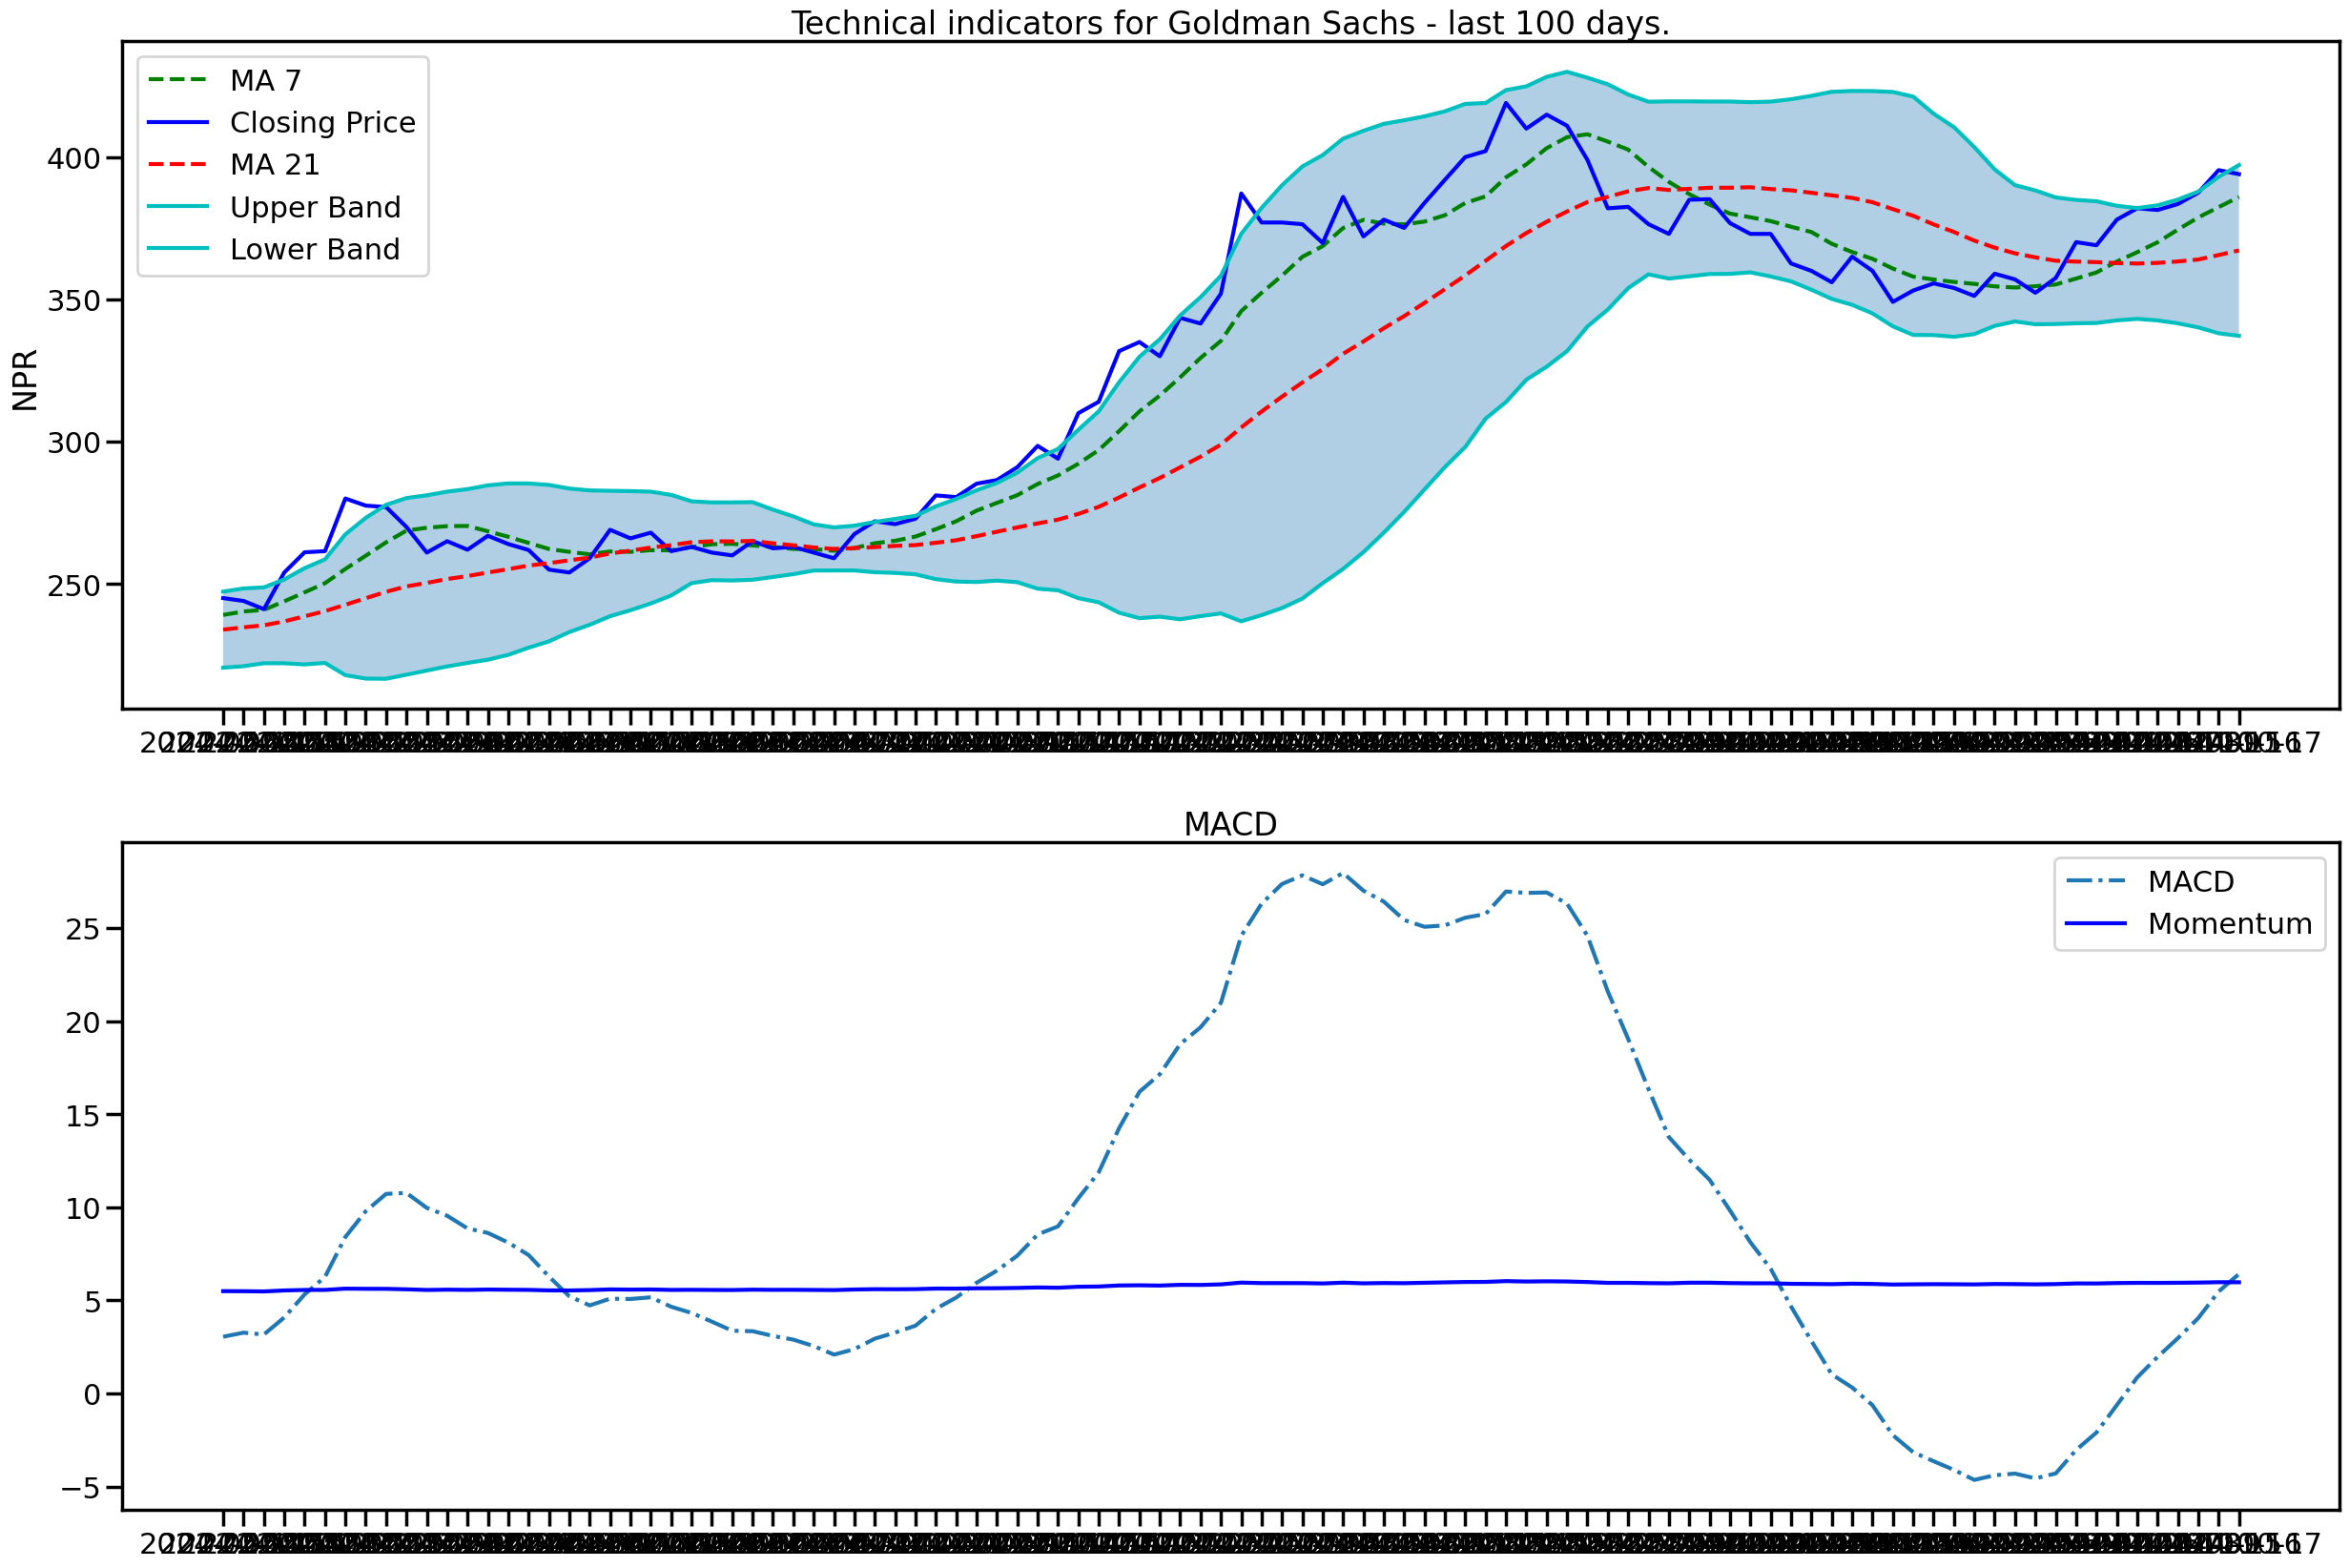

In [88]:
plot_technical_indicators(df, 100)

In [89]:
df

,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,
2010-10-24,134.0,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
2010-10-25,136.0,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
2010-10-26,135.0,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
2010-10-27,135.0,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
2010-10-28,145.0,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-08,381.4,370.042857,362.804762,367.059934,369.023022,1.963088,10.110118,383.024997,342.584527,380.778927,380.4,5.941223
2024-10-09,383.5,374.500000,363.304762,368.277717,371.250249,2.972533,10.870578,385.045919,341.563605,382.592976,382.5,5.946729
2024-10-15,387.5,378.785714,363.995238,369.701590,373.750211,4.048621,11.926419,387.848077,340.142400,385.864325,386.5,5.957132


Text(0.5, 1.0, 'Params')

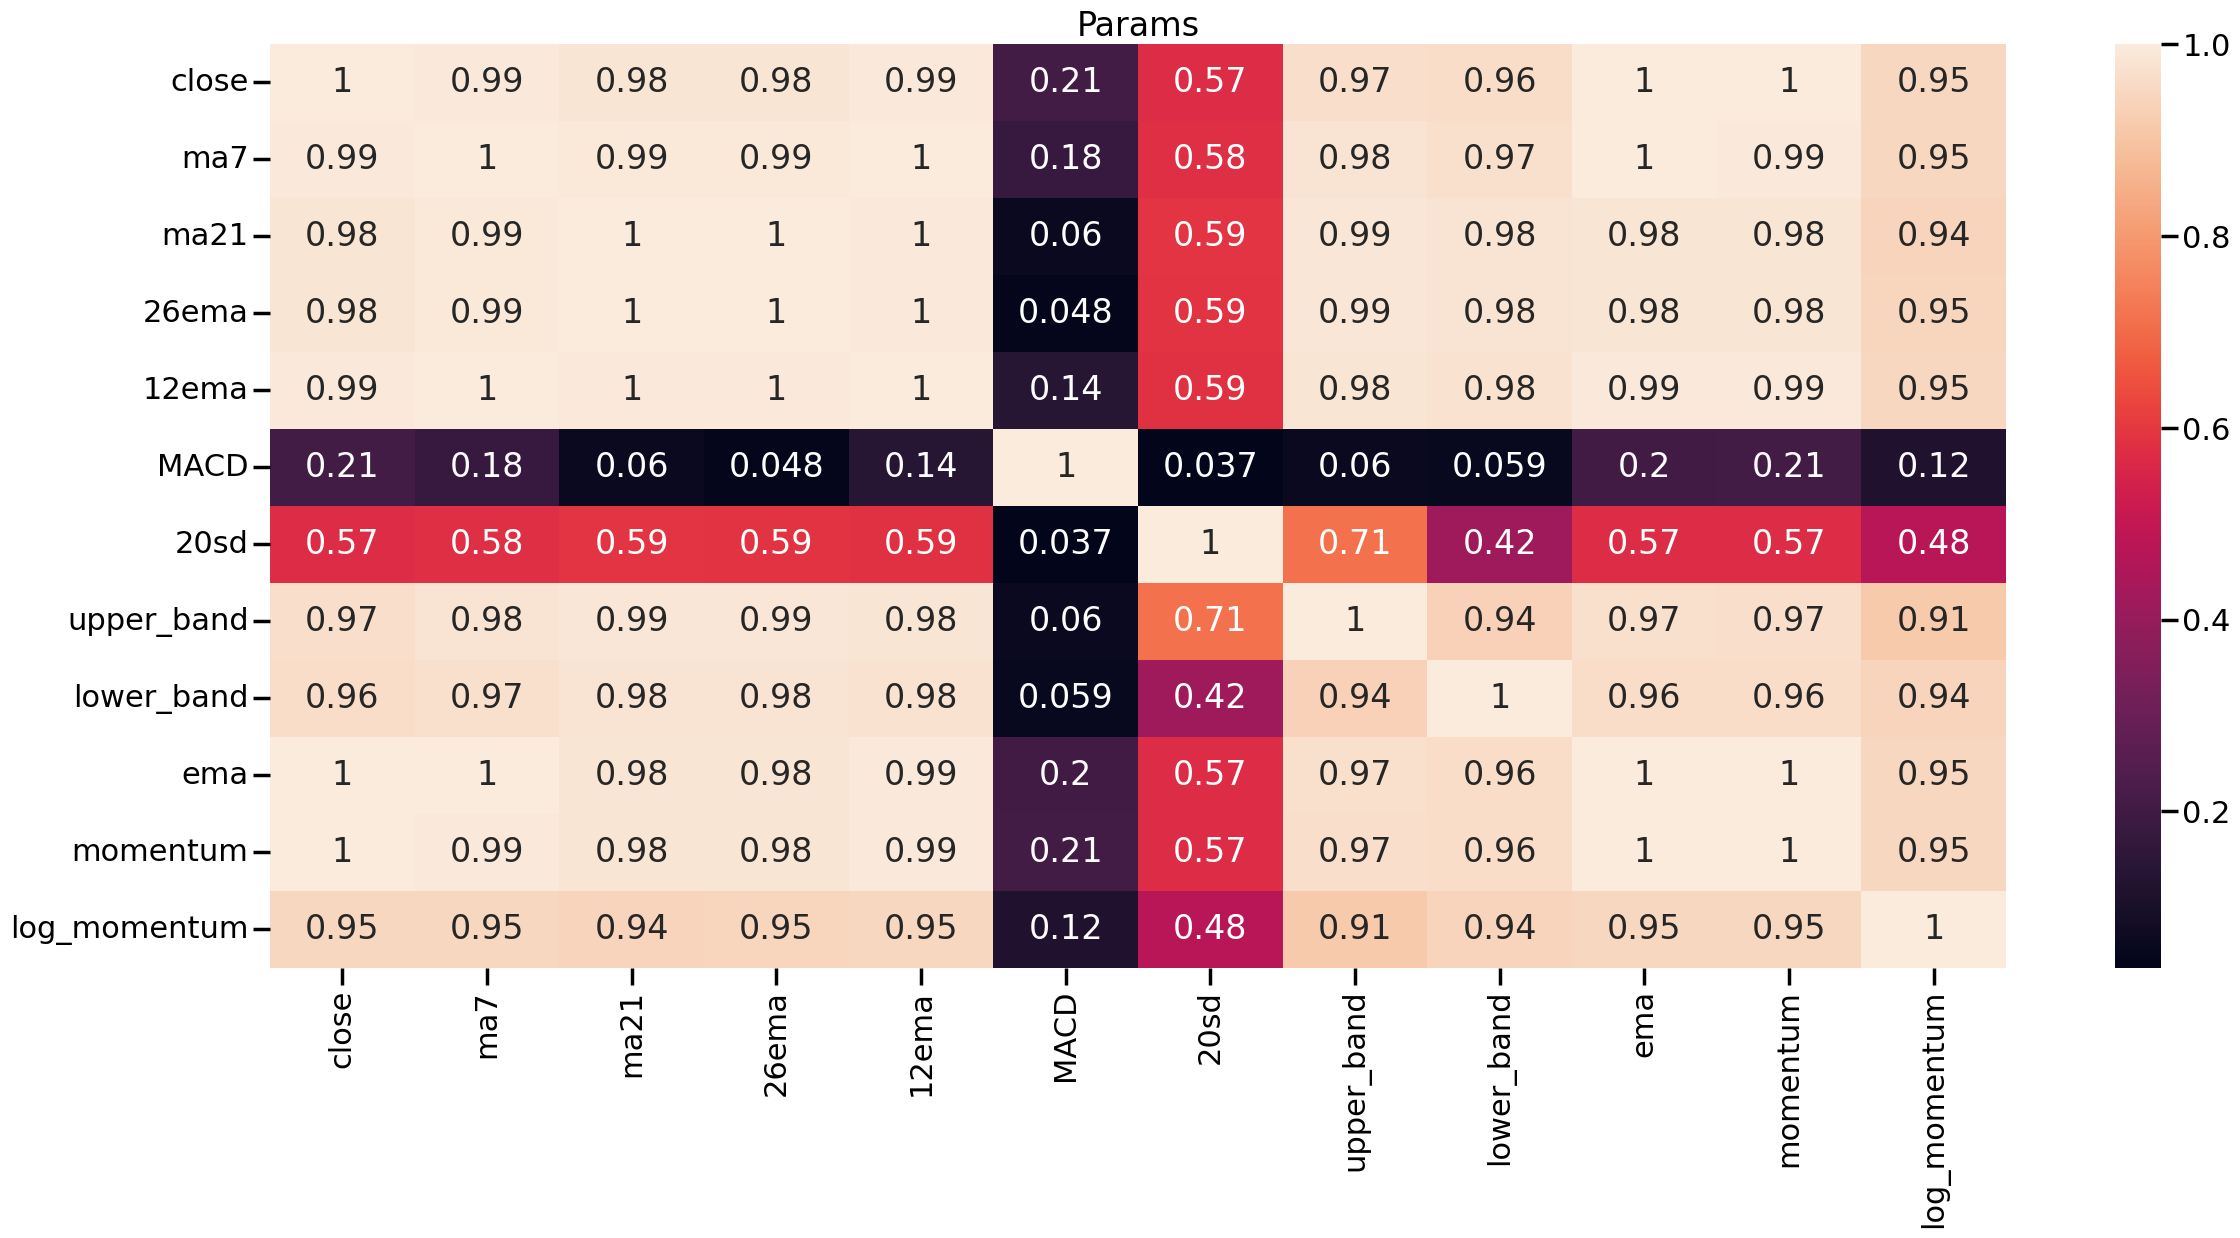

In [90]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(df.corr(), annot = True).set_title('Params')

In [91]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 3203 samples, and 12 features.


In [92]:
df.columns

Index(['close', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum'],
      dtype='object')

In [93]:
df

,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,
2010-10-24,134.0,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
2010-10-25,136.0,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
2010-10-26,135.0,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
2010-10-27,135.0,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
2010-10-28,145.0,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-08,381.4,370.042857,362.804762,367.059934,369.023022,1.963088,10.110118,383.024997,342.584527,380.778927,380.4,5.941223
2024-10-09,383.5,374.500000,363.304762,368.277717,371.250249,2.972533,10.870578,385.045919,341.563605,382.592976,382.5,5.946729
2024-10-15,387.5,378.785714,363.995238,369.701590,373.750211,4.048621,11.926419,387.848077,340.142400,385.864325,386.5,5.957132


In [94]:
data_training = df[df.index < '2022-01-31'].copy()
data_training

,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,
2010-10-24,134.0,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
2010-10-25,136.0,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
2010-10-26,135.0,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
2010-10-27,135.0,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
2010-10-28,145.0,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,422.0,433.457143,440.047619,441.624454,432.701533,-8.922921,28.211533,496.470686,383.624552,425.122846,421.0,6.042633
2022-01-25,419.9,431.300000,436.233333,440.015235,430.732066,-9.283169,24.923811,486.080954,386.385712,421.640949,418.9,6.037632
2022-01-26,416.4,427.785714,432.585714,438.265958,428.527133,-9.738825,21.581735,475.749184,389.422244,418.146983,415.4,6.029242


In [95]:
data_testing = df[df.index >= '2022-01-31'].copy()
data_testing

,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,
2022-01-31,422.0,421.742857,426.238095,434.780094,425.755036,-9.025058,7.479069,441.196234,411.279957,422.086925,421.0,6.042633
2022-02-01,423.0,420.714286,426.619048,433.907495,425.331184,-8.576311,7.070617,440.760281,412.477814,422.695642,422.0,6.045005
2022-02-03,420.6,420.514286,426.552381,432.921754,424.603310,-8.318445,7.122754,440.797888,412.306874,421.298547,419.6,6.039302
2022-02-06,418.0,420.242857,426.504762,431.816439,423.587416,-8.229023,7.178891,440.862544,412.146980,419.099516,417.0,6.033086
2022-02-07,417.0,420.328571,426.314286,430.718925,422.573967,-8.144958,7.382431,441.079147,411.549424,417.699839,416.0,6.030685
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-08,381.4,370.042857,362.804762,367.059934,369.023022,1.963088,10.110118,383.024997,342.584527,380.778927,380.4,5.941223
2024-10-09,383.5,374.500000,363.304762,368.277717,371.250249,2.972533,10.870578,385.045919,341.563605,382.592976,382.5,5.946729
2024-10-15,387.5,378.785714,363.995238,369.701590,373.750211,4.048621,11.926419,387.848077,340.142400,385.864325,386.5,5.957132


In [96]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(2566, 12)


array([[0.03363914, 0.03191329, 0.02192823, ..., 0.0333404 , 0.03363914,
        0.11979934],
       [0.03567788, 0.03251543, 0.0227616 , ..., 0.03474986, 0.03567788,
        0.12606938],
       [0.03465851, 0.03251543, 0.02364706, ..., 0.03453553, 0.03465851,
        0.12294606],
       ...,
       [0.32150866, 0.34239049, 0.35868014, ..., 0.32499944, 0.32150866,
        0.59823092],
       [0.32212029, 0.3389282 , 0.35466951, ..., 0.32421474, 0.32212029,
        0.59883725],
       [0.32996942, 0.33767876, 0.35116412, ..., 0.3292211 , 0.32996942,
        0.60654177]])

In [97]:
X_train = []
y_train = []

In [98]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [99]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((2506, 60, 12), (2506,))

In [100]:
regressor = Sequential()    #Sequential   because we are predicting the stock market price.....

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 12)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

C:\Users\L E G I O N\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [101]:
regressor.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 50)         │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 60, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 60, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,961 (706.88 KB)

 Trainable params: 180,961 (706.88 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [103]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0397
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0065
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0058
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0052
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0062
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0047
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0052
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0048
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0039
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0039
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0032
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0037
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0030
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0027
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0028
Epoc

# Testing Started

In [104]:
past_60 = data_training.tail(60)

dt = pd.concat([past_60, data_testing], ignore_index=True)
dt

,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,521.0,526.000000,511.209524,520.556934,520.896206,0.339272,14.690844,540.591212,481.827835,525.426823,520.0,6.253829
1,528.5,529.642857,512.138095,521.145309,522.066020,0.920711,15.153200,542.444496,481.831695,527.475608,527.5,6.268149
2,542.9,534.057143,513.609524,522.756767,525.271248,2.514480,16.572867,546.755257,480.463791,537.758536,541.9,6.295081
3,528.0,534.485714,514.561905,523.145155,525.691056,2.545901,16.807393,548.176692,480.947118,531.252845,527.0,6.267201
4,515.0,529.342857,515.371429,522.541810,524.046278,1.504468,16.373611,548.118651,482.624206,520.417615,514.0,6.242223
...,...,...,...,...,...,...,...,...,...,...,...,...
692,381.4,370.042857,362.804762,367.059934,369.023022,1.963088,10.110118,383.024997,342.584527,380.778927,380.4,5.941223
693,383.5,374.500000,363.304762,368.277717,371.250249,2.972533,10.870578,385.045919,341.563605,382.592976,382.5,5.946729
694,387.5,378.785714,363.995238,369.701590,373.750211,4.048621,11.926419,387.848077,340.142400,385.864325,386.5,5.957132
695,395.4,382.400000,365.557143,371.605175,377.080948,5.475772,13.743856,393.044854,338.069431,392.221442,394.4,5.977366


In [105]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(697, 12)


array([[0.9314554 , 0.97251018, 0.97940511, ..., 0.96073729, 0.9314554 ,
        0.95368012],
       [0.95492958, 0.98431137, 0.98262564, ..., 0.96726038, 0.95492958,
        0.96975915],
       [1.        , 0.99861163, 0.98772895, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.51361502, 0.49560348, 0.4688269 , ..., 0.51638686, 0.51361502,
        0.62053882],
       [0.53834116, 0.50731211, 0.474244  , ..., 0.53662716, 0.53834116,
        0.64325796],
       [0.53395931, 0.5188819 , 0.47985929, ..., 0.54040231, 0.53395931,
        0.63926515]])

In [106]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape


((637, 60, 12), (637,))

In [108]:
y_pred = regressor.predict(X_test)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [109]:
scale = 1/scalar.scale_[0]# Reshape y_pred and y_test to match the shape expected by inverse_transform
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Inverse transform to get the actual stock prices
y_pred_actual = scalar.inverse_transform(np.concatenate((y_pred, inputs[60:, 1:]), axis=1))[:, 0]
y_test_actual = scalar.inverse_transform(np.concatenate((y_test, inputs[60:, 1:]), axis=1))[:, 0]


# Visualization of All the Codes and Work Done Above

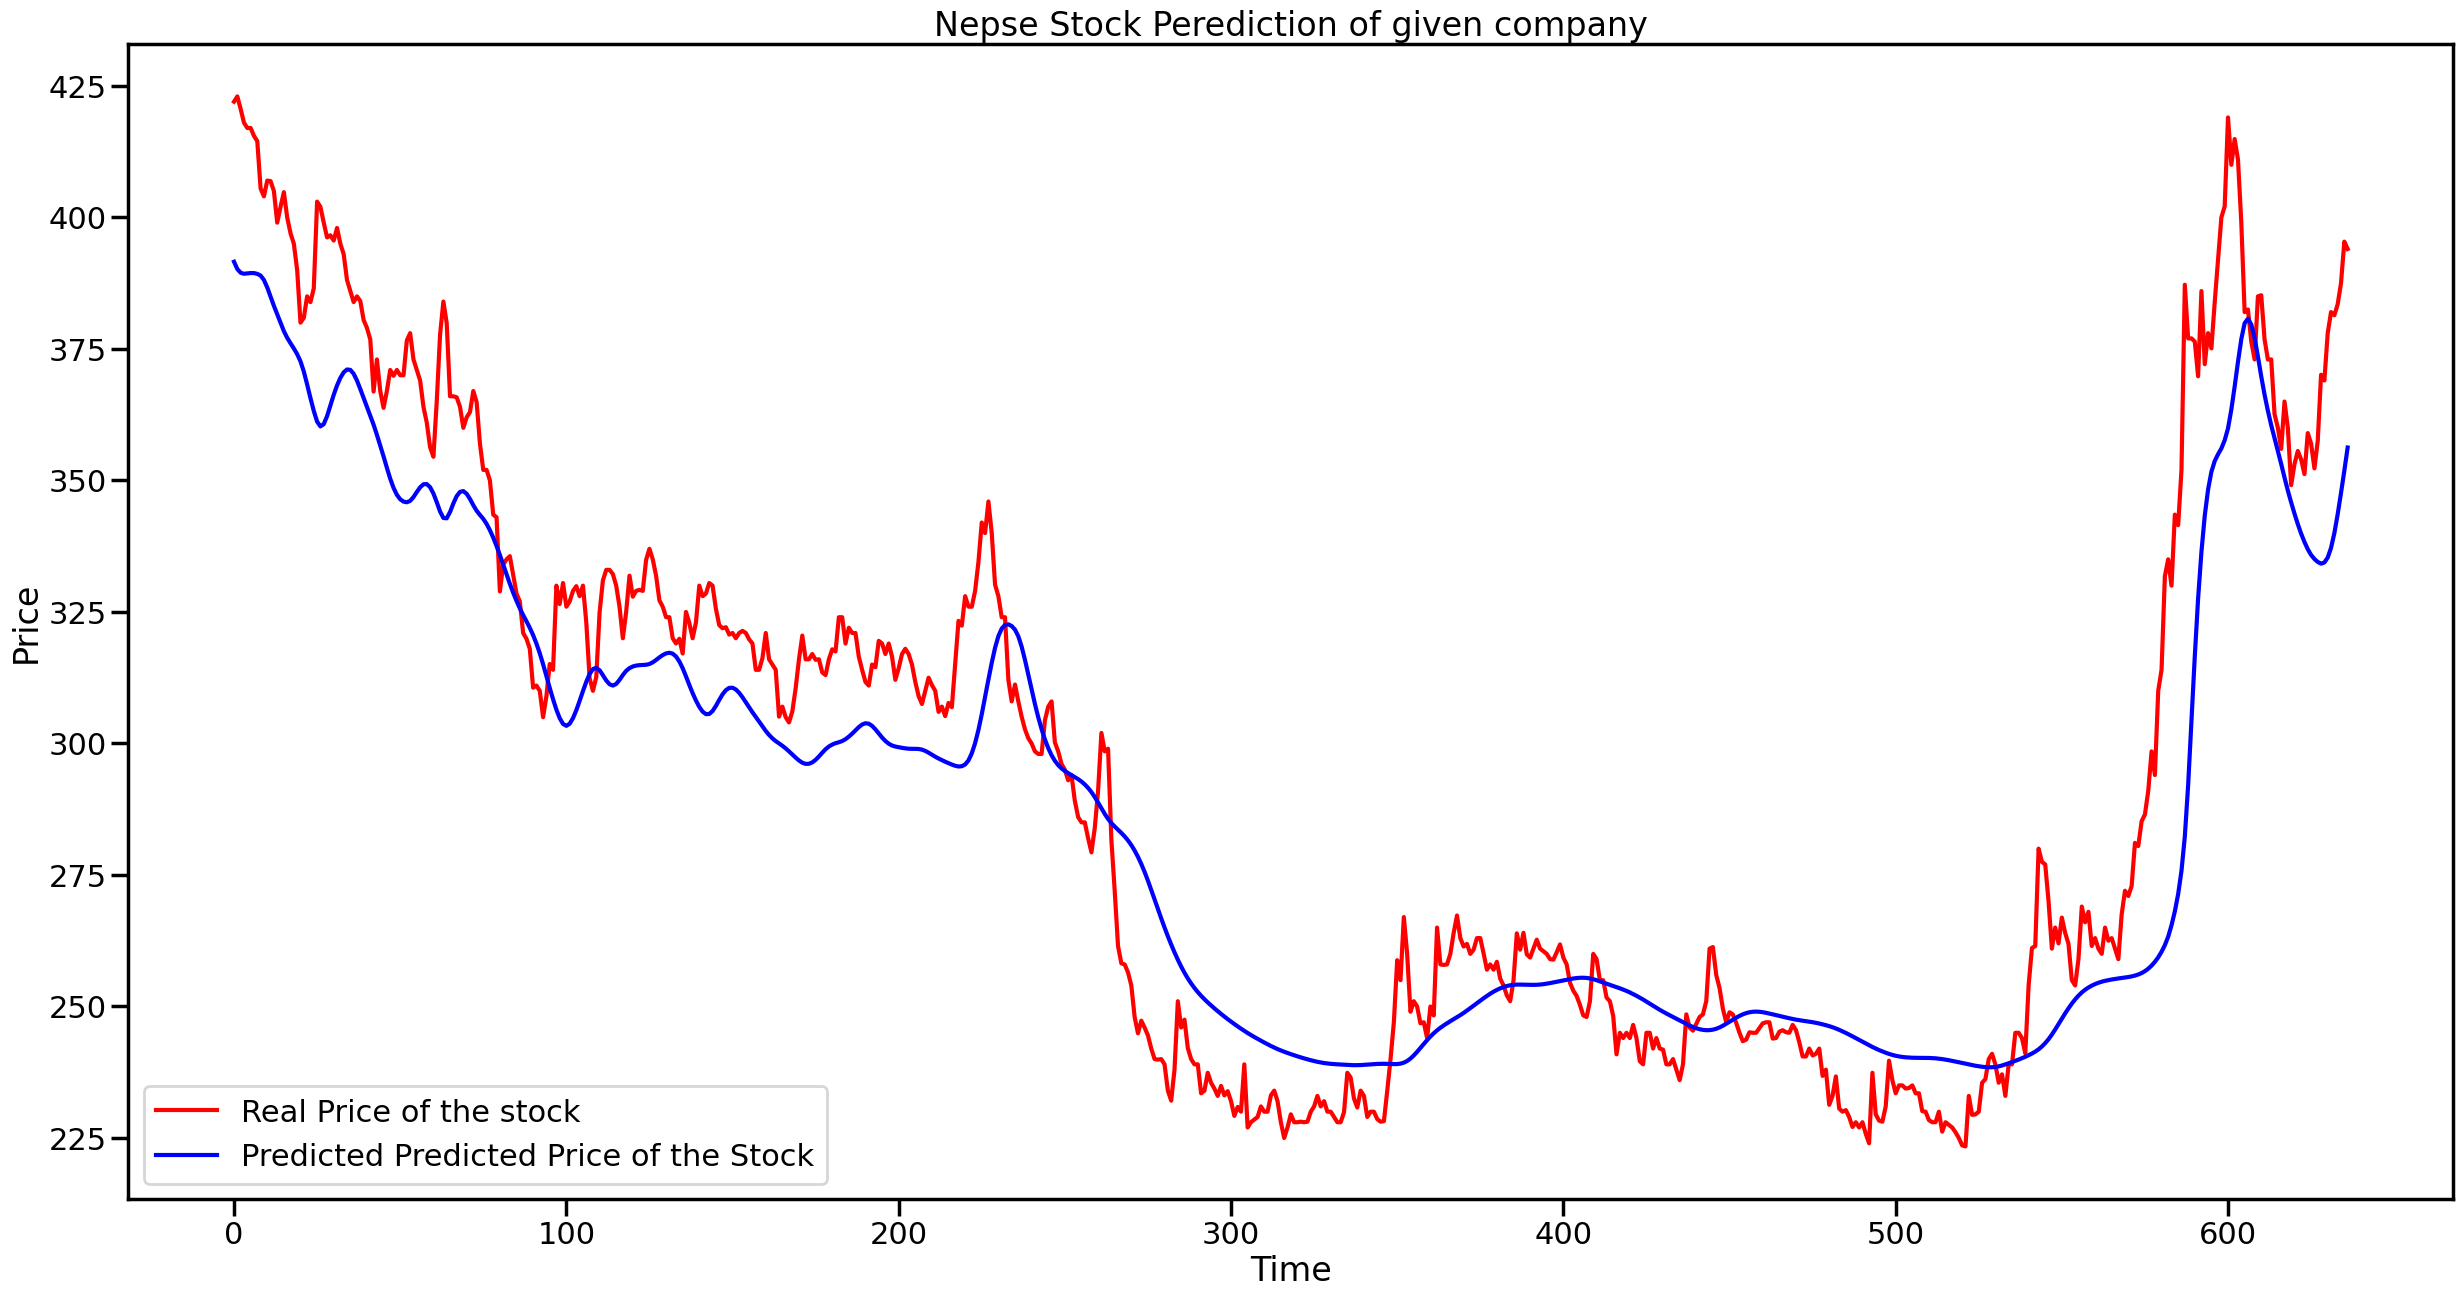

In [110]:
# Visualising the results
plt.figure(figsize=(30,15))
plt.plot(y_test_actual, color = 'red', label = 'Real Price of the stock')
plt.plot(y_pred_actual, color = 'blue', label = 'Predicted Predicted Price of the Stock')
plt.title('Nepse Stock Perediction of given company')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()